### Testing out the Maximum Likelihood Estimator and SSE on a noisy signal to estimate its original frequency. 

In this code we use the loss functions defined by us to estimate the sinusoid frequency f0. We try to find the value of f0 by searching for the optimal parameters for which the SSE loss is minimised or Maximum Likelihood loss is Maximised. We compute multiple values under frange and select the correct one according to the loss.

the noise w[n] is intrinsic property of real measurements. The model with the noise term is defined as
x[n] = A cos (2πf<sub>0</sub>n + φ) + w[n] ,

where w[n] ∼ N (0, σ2).

The ML estimator θ<sub>ML</sub> estimates the model parameters by finding the values
that maximise the probability of obtaining them. This is done by computing the
product of likelihood of each sample p(x[n]; θ).

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Will be used to Form a sinusoidal signal
N = 160
n = np.arange(N).astype(np.longdouble)  #creates a numeric sequence of numbers from 0 to 159
f0 = 0.06752728319488948           #Actual frequency will be used to generate actual signal. << This will be ground truth.

print(n)


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159.]


#### Add Noise to pure signal keeping certain parameters like phase and Amplitude constant.

In [13]:
# ========================================================Add noise to the signal
#sigmaSq = 0.0 # 1.2

sigmaSq = 0.18 # 1.2           # Variance by which our noisy signal will vary, 
                               # we'll try different values to see how robust is our system.
#sigmaSq = 2.0 #1.9 # 1.2

phi = 0.6090665392794814     #Phase  original
A = 0.6669548209299414       #Amplitude   original


x0 = A * np.cos(2 * np.pi * f0 * n+phi)    #Generate actual pure signal using the n sequence we used earlier, it will create
# 160 data points which will follow the above cosine function with given freq. and phase (basically generate a signal...)

print("Length of pure signal x0:",len(x0))
#print("x0:",x0)

#Create a Noisy signal using variance defined earlier.
x = x0 + sigmaSq * np.random.randn(x0.size) #Noise values added to pure signal, basically noisy signal
print("Length of Noisy signal x:",len(x))

Length of pure signal x0: 160
Length of Noisy signal x: 160


We create estimation parameters like A_hat, phi_hat and fRange.

Here, we are keeping values of amplitude and phase as original signal, that is no noise in amplitude and phase. Now, we create an estimated range of frequencies over which we will perform search. This is kind of like Bruteforce approach.

The graph is for visualization that show how the pure signal shown in blue varies with noise in green dots.

Variance(SigmaSq): 0.18  A: 0.6669548209299414  Phase: 0.6090665392794814  Samples: 112


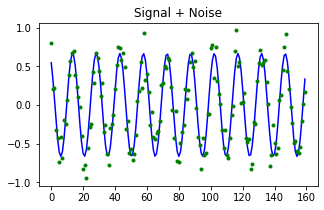

In [17]:
# Estimation parameters   (assuming others to be fixed at the specified value, we are only searching for freq.)

A_hat = A*1.0        #1.9  #Amplitude   keeping it as constant value
phi_hat = phi*1.0    #1.9  #Phase  keeping it as constant value at 1.0, change it to see the difference


fRange = np.linspace(0, 0.5, 112) #100 112 800 423   #create 112 samples between 0 and 0.5 freq. resolution will be 0.5/112 per value.
                                  # Try different values 

    #print(fRange)
print("Variance(SigmaSq):", sigmaSq, " A:", A_hat, " Phase:",phi_hat," Samples:",len(fRange))

plt.figure(figsize=(5, 3))
plt.title("Signal + Noise")
plt.plot(x0,'b-')
plt.plot(x,'g.')
plt.show()



#### Create functions to calculate SSE loss, MLE loss and a helper function to calculate gaussian.

In SSE function, we subtract the signal created by changing  our estimated parameters frequency (fRange) from the ***Noisy signal*** and collect the difference. The frequency at which it shows minimum difference is the one closest to original. (we take mean to get MSE.)

FOR MLE, we search for the parameter fRange that makes the probability of our sample data maximum or **Most Likely**.

We use the following formula to calculate the probability distribution over our signal by subtracting the sample signal from noisy signal using our gaussian helper function.

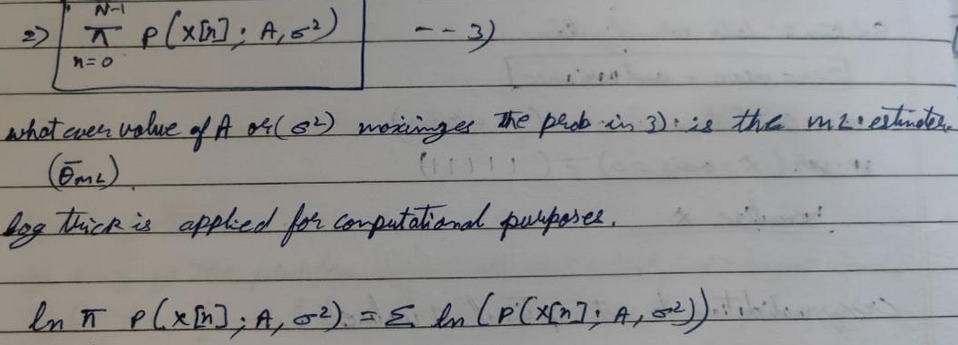

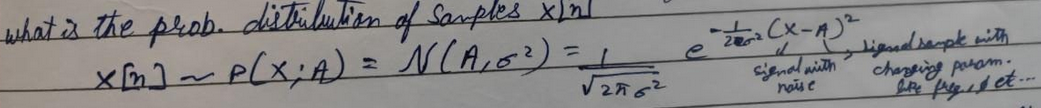

In [2]:
def SSE(A, phi, x_val, f_val):
    L_MSE = 0.0
    L_MSE += (x_val - A * np.cos(2 * np.pi * f_val * n+phi))**2 #take noisy signal and subtract 
#a sample signal (created as above but for a specified freq.) with different freq. (do it for multiple freq.(brute force)) 
#value and calculate the error
    
    L_MSE = np.mean(L_MSE)
   # print("L_MSE:",len(L_MSE))
    #print("L_MSE:",L_MSE)
    #L_MSE = np.sum(L_MSE)/len(x_val)
    return L_MSE


def gaussian(x, mu, sig):              #calculates probability distribution, sample sig. subtracted from noisy sig.
    Z = (1/np.sqrt(2*np.pi*sig**2.))
    return Z * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


def MLE(A,phi,x_val,f_val,sigma):
    L_MLE = 0
    mu = A * np.cos(2 * np.pi * f_val * n + phi) #sample signal to be subtracted from noisy signal (x-mu)**2
    L_MLE += np.prod(gaussian(x_val, mu, sigma))
    return L_MLE



Execute functions to search for correct estimated parameter.

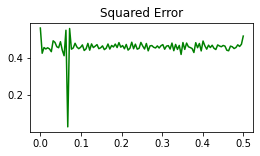

MLE Frequency: 0.06756756756756757


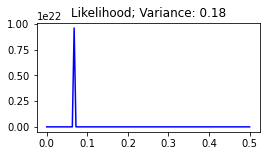

In [21]:

SSE_val = []  #list to store the SSE error values for multiple fRanges.
MLE_val = []  #list to store the MLE error values for multiple fRanges.

for i in fRange:   #here, i will hold the specific f value at which signal is tested.

    SSE_val.append(SSE(A_hat, phi_hat, x, i))           
    MLE_val.append(MLE(A_hat, phi_hat, x, i, sigmaSq))

#Plot the SSE error

plt.figure(figsize=(4, 2))
plt.title("Squared Error")
plt.plot(fRange,SSE_val, color='g')
plt.show()

    
maxid = np.argmax(MLE_val)              #Get index of item in list which has maximum value
print("MLE Frequency:", fRange[maxid])  #Get that maximum item (in this case, it is frequency.)

plt.figure(figsize=(4, 2))
plt.title("Likelihood; Variance: %1.2f" %sigmaSq)  #print the value of variance used.
plt.plot(fRange,MLE_val, color='b')
plt.show()


**Let's check if it fits on our Ground truth signal!**

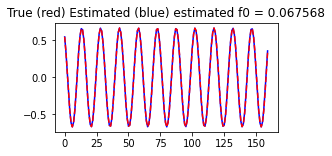

In [6]:
##Estimated Plot

x2 = A_hat * np.cos(2 * np.pi * fRange[maxid] * n+phi_hat)

plt.figure(figsize=(4, 2))
plt.title("True (red) Estimated (blue) estimated f0 = %1.6f" %fRange[maxid])
plt.plot(x2,"b-")    #Estimated signal
plt.plot(x0,"r--")   #Pure signal
plt.show()

**Note:** If we add more noise, then the SSE method for estimating frequency almost becomes useless. MLE still performs well.

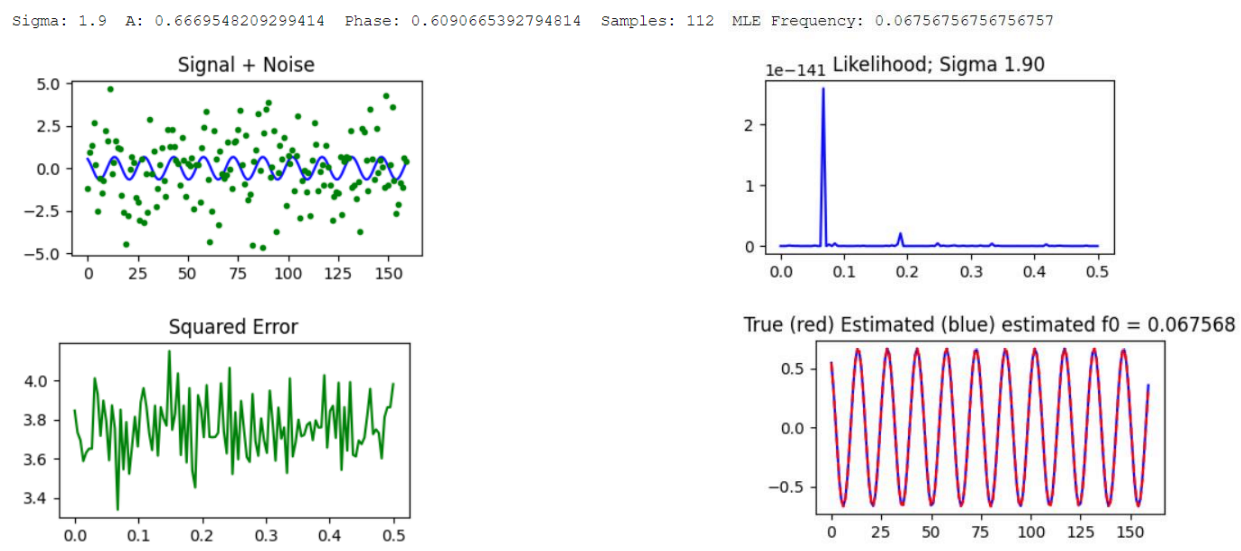

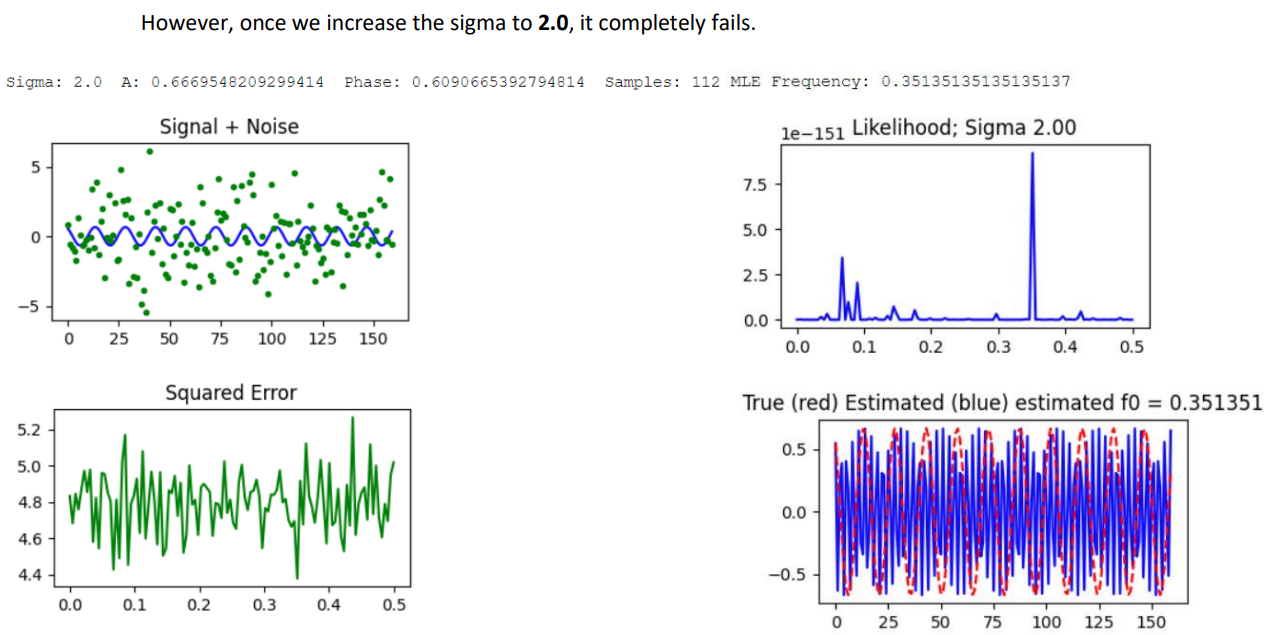

#### Changing Other parameters

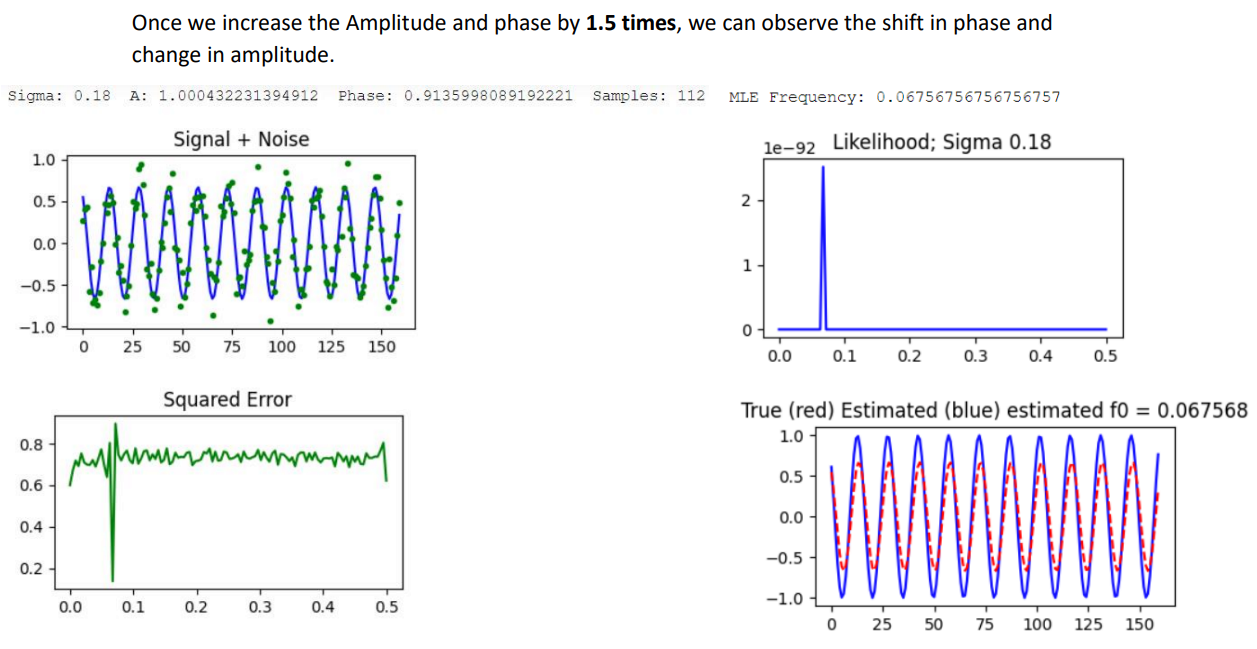

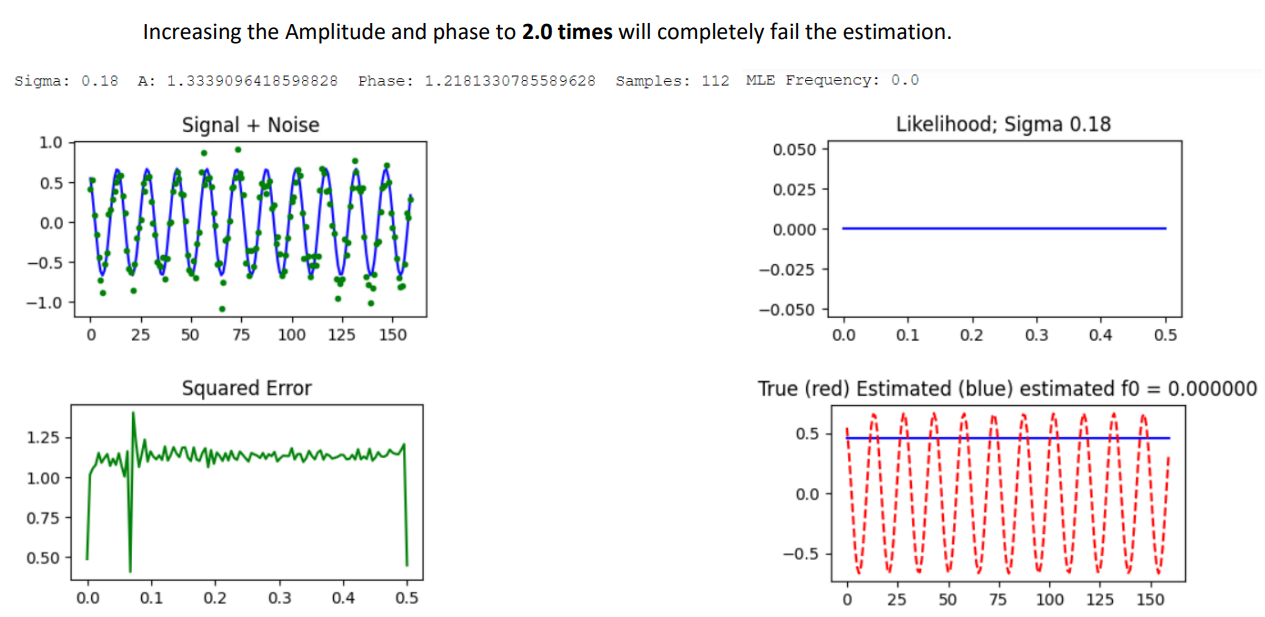